## HOMEWORK EXERCISE

starting from the problem and parameters present on [this link](https://www.linkedin.com/posts/andrea-palladino-22476a110_supponiamo-di-avere-una-malattia-che-colpisce-activity-7301207689387212801-VPix?utm_source=share&utm_medium=member_android&rcm=ACoAAAksxjABZB9m8X74la1Lx6eNknqoFjhuwXQ):
- create a synthetic training set resembling the described context
- fit a classification model 
- compare results with the test results described in the link

Matrice di Confusione:
[[2990    0]
 [   6    4]]

Report di Classificazione:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2990
           1       1.00      0.40      0.57        10

    accuracy                           1.00      3000
   macro avg       1.00      0.70      0.79      3000
weighted avg       1.00      1.00      1.00      3000


Recall (Sensibilità): 0.4000
F1-Score: 0.5714


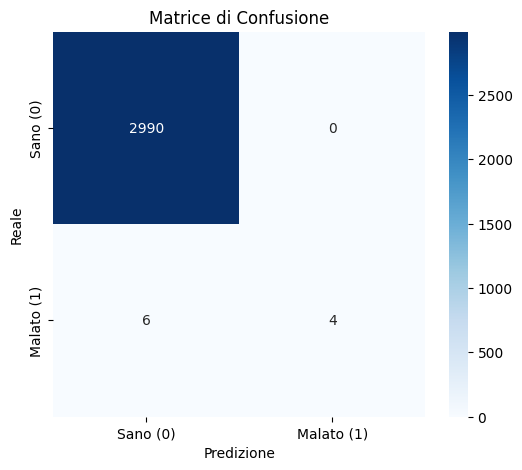

F1-Score Originale: 0.15
Il nuovo modello ha un F1-Score migliore rispetto al test originale: 0.5714


In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, recall_score, f1_score


# Parametri
n_samples = 10000  # Numero totale di campioni
prevalence = 0.005  # Prevalenza della malattia 
random_seed = 42  # Impostiamo un seme per la riproducibilità

# Impostiamo il seme per la generazione casuale
np.random.seed(random_seed)

# 1. Generazione del target "veramente malato" (disease status) in base alla prevalenza
disease_status = np.random.binomial(1, prevalence, n_samples)

# 2. Generazione delle variabili informative
# Traslucenza nucale:
translucenza_nucale = np.random.uniform(1.0, 3.0, n_samples)

# Salute della placenta: 
salute_placenta = np.random.uniform(0.0, 1.0, n_samples)

# Età della madre: le madri di bambini malati tendono ad essere più anziane
eta_madre = np.random.randint(18, 46, n_samples)
eta_madre = np.where(disease_status == 1, eta_madre + np.random.randint(2, 5, n_samples), eta_madre)

# 3. Creazione del DataFrame
df = pd.DataFrame({
    'traslucenza_nucale': translucenza_nucale,
    'salute_placenta': salute_placenta,
    'eta_madre': eta_madre,
    'disease_status': disease_status  # Lo stato reale della malattia (target)
})

# Divisione del dataset in variabili indipendenti (X) e variabile dipendente (y)
X = df[['traslucenza_nucale', 'salute_placenta', 'eta_madre']]
y = df['disease_status']

# Divisione in training set e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed)

# 5. Creazione e allenamento del modello Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 6. Predizione sui dati di test
y_pred = rf_model.predict(X_test)

# 7. Calcolo delle metriche di classificazione
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Mostriamo i risultati
print("Matrice di Confusione:")
print(conf_matrix)
print("\nReport di Classificazione:")
print(classification_rep)
print(f"\nRecall (Sensibilità): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# 8. Visualizzazione della matrice di confusione
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Sano (0)', 'Malato (1)'], yticklabels=['Sano (0)', 'Malato (1)'])
plt.title('Matrice di Confusione')
plt.xlabel('Predizione')
plt.ylabel('Reale')
plt.show()

# 9. Confronto con i risultati del test descritto
original_f1_score = 0.15  # F1-Score del test originale
print(f"F1-Score Originale: {original_f1_score}")
if f1 > original_f1_score:
   print(f"Il nuovo modello ha un F1-Score migliore rispetto al test originale: {f1:.4f}")
else:
    print("Il nuovo modello non ha migliorato l'F1-Score originale")


### **Confronto con il testo**:
Nel testo il modello ha:

- **Elevato recall (90%)**,  il modello identifica  il 90% delle persone malate (i veri positivi).
- **Bassa precision (8%)**,  quando il modello dice che una persona è malata, ha solo l'8% di probabilità di indovianare.
- **F1-Score basso (0.15)**, perchè c'è una grande differenza tra precision e recall.

### **Differenze principali**:

1. **Recall**:
   - Nella mia analisi il **recall è 0.40 (40%)**, molto più basso rispetto al 90% descritto nel testo. Il modello non è altrettanto bravo a identificare le persone malate

2. **Precision**:
   - Nella mia analisi la **precisione per il gruppo di persone malate (classe 1)** è **1.00**, quindi quando il modello prevede che una persona è malata, ha il 100% di probabilità di essere corretto. Però il numero di veri positivi (4) è molto basso rispetto ai falsi negativi (6). 
   - Nel testo, la precisione è bassa (8%), il che implica che il modello tende a generare **molti falsi positivi**. In questo caso, il modello descrive una situazione con molti malati correttamente identificati, ma anche molte persone sane erroneamente diagnosticate come malate.

3. **F1-Score**:
   - Nella mia analisi, l'**F1-Score è 0.5714**,  è migliore rispetto a 0.15 nel testo. c'è un certo bilanciamento tra recall e precisione, ma comunque dovrebbe essere migliorato
   - Nel testo, l'F1-Score molto basso (0.15) è il risultato di un **alto recall ma bassa precisione** (molti falsi positivi), creando una situazione in cui il modello sembra efficace nell'identificare i malati, ma genera molti allarmi inutili.

4. **Accuracy**:
   - La **precisione complessiva** della mia analisi è alta, pari al 100% (1.00). Questo potrebbe essere fuorviante perché la tua prevalenza della malattia è molto bassa (5 malati su 1000), e quindi il modello è molto riesce a  predire meglio una persona non malata
   - Nel caso del test descritto nel testo, il modello avrebbe una **precisione più bassa** a causa dell'alto numero di falsi positivi, quindi anche l'accuratezza sarebbe più bassa rispetto al tuo modello.

### **Conclusioni**:

1. **Differente gestione dei falsi positivi e negativi**: nella mia analisi, ho una precisione altissima per la classe 1 (malati), ma la **recall è bassa**. Non sto identificando in modo corretto tutte le persobe malate. Al contrario, nel testo, il modello descritto soffre di molti **falsi positivi** (con un alto recall ma bassa precisione), e il test genera **molti allarmi inutili**.

2. **F1-Score più alto nel tuo modello**: Nella mia analisi ho un F1-Score migliore (0.5714), ma ho una bassa recall. 